Лукьянченко Иван ФИИТ

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Чтение данных изображения

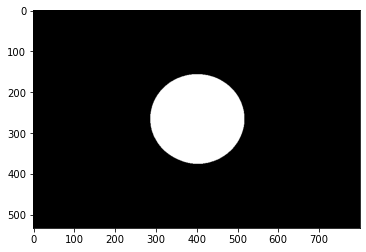

In [2]:
image1 = cv2.imread('C:\\Users\\user\\Downloads\\img1.jpg', 0)
_ , thresh_bin1 = cv2.threshold(image1, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_bin1, cmap="gray")

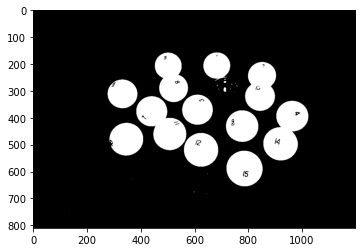

In [3]:
image2 = cv2.imread('C:\\Users\\user\\Downloads\\img2.jpg', 0)
_ , thresh_bin2 = cv2.threshold(image2, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_bin2, cmap="gray")

Удалим шумы

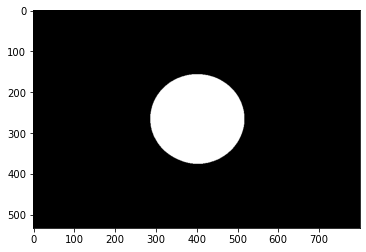

In [4]:
kernel = np.ones((5,5), np.uint8)
clean1 = cv2.morphologyEx(thresh_bin1, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(clean1, cmap="gray")

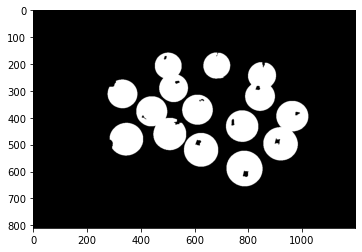

In [5]:
clean2 = cv2.morphologyEx(thresh_bin2, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(clean2, cmap="gray")

Работа с контурами

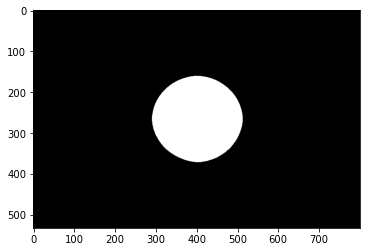

In [33]:
erode1 = cv2.erode(clean1, kernel, iterations=2)
plt.imshow(erode1, cmap="gray")

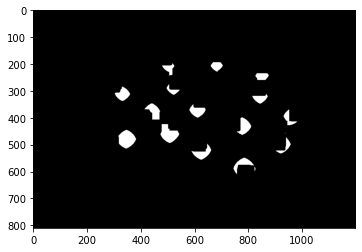

In [84]:
erode2 = cv2.erode(clean2, kernel, iterations=11)
plt.imshow(erode2, cmap="gray")

1

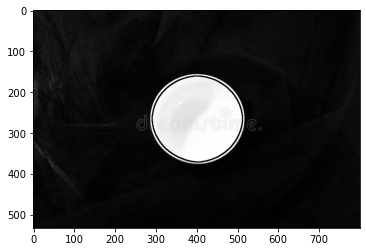

In [85]:
contours1, hierarchy1 = cv2.findContours(erode1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_image1_1 = image1.copy()
cv2.drawContours(copy_image1_1, contours1, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(copy_image1_1, cv2.COLOR_BGR2RGB))
len(contours1)

17

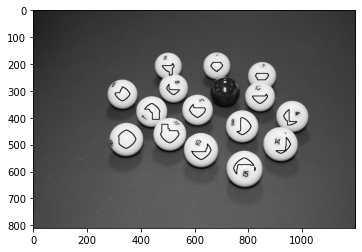

In [86]:
contours2, hierarchy2 = cv2.findContours(erode2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_image2_1 = image2.copy()
cv2.drawContours(copy_image2_1, contours2, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(copy_image2_1, cv2.COLOR_BGR2RGB))
len(contours2)

Анализ контуров

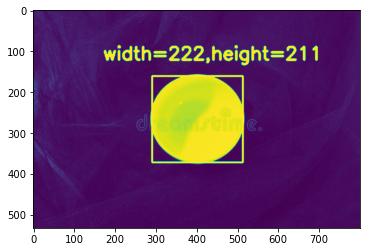

In [87]:
width1 = 0
height1 = 0
copy_image1_2 = image1.copy()
x1,y1,width1,height1 = cv2.boundingRect(contours1[0])
cv2.rectangle(copy_image1_2, (x1, y1), (x1 + width1, y1 + height1), (255,0,0), 3)
cv2.putText(copy_image1_2, "width={},height={}".format(width1,height1), (x1-120,y1-40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 6)
plt.imshow(copy_image1_2)

In [88]:
radius1 = (height1 + width1)/4
print("Radius: ")
print(radius1)
average1 = radius1
print("Average: ")
print(average1)
dispersion1 = (radius1-avg1)**2
print("Dispersion: ")
print(dispersion1)

Radius: 
108.25
Average: 
108.25
Dispersion: 
0.0


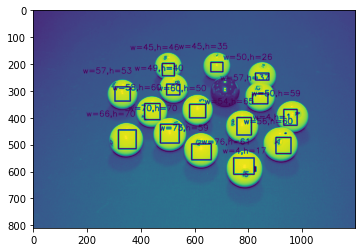

In [97]:
width2 = []
height2 = []
copy_image2_2 = image2.copy()
for i in range(len(contours2)):
    x2,y2,w2,h2 = cv2.boundingRect(contours2[i])
    width2.append(w2)
    height2.append(h2)
    cv2.rectangle(copy_image2_2, (x2, y2), (x2 + w2, y2 + h2), (0,255,255), 3)
    cv2.putText(copy_image2_2, "w={},h={}".format(w2,h2), (x2-120,y2-50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)
plt.imshow(copy_image2_2)

In [99]:
radius2 = []
for i in range(len(width2)):
    radius2.append((height2[i] + width2[i])/4) 
print("Radius: ")
print(radius2)
average2 = sum(radius2)/len(radius2)
print("Average: ")
print(average2)
abc = 0
for i in radius2:
    abc += (i - average2)**2
dispersion2 = abc/len(radius2)
print("Dispersion: ")
print(dispersion2)

Radius: 
[5.25, 34.25, 33.0, 29.0, 1.25, 34.0, 35.0, 29.75, 27.25, 27.5, 29.5, 23.5, 27.5, 22.25, 19.0, 22.75, 20.0]
Average: 
24.75
Dispersion: 
84.46323529411765


Вывод

Первое изображение является базовым, и наиболее удобным и качественным для тестирования, а вслучае второго изображения, наблюдаем высокий показатель дисперсии, и малую область выделения объектов, что можно объяснить сложным выделением границ из-за типа изображения(много объектов пересенных друг с другом)